In [1]:
# TP1 Régression lineaire

## I- Régression linéaire simple (prédire une variable expliquée à partir d'une seule variable explicative)

## Dans cette premiere partie de ce TP, vous devez implémenter la régression linéaire simple.  
## Vous allez prédire le poids d'une personne en fonction de sa taille

### I-1. importation des librairies

In [2]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd


### I-2. Création du dataset d'entrainement-

In [3]:
X_train = np.array([160.0, 165.0, 170.0, 175.0,180.0, 185.0, 190])  # taille
y_train = np.array([66, 68.23, 70.44, 71.29, 73.86,74.68,76.28])    # poids

X_test = np.array([155,157,175.0, 180.0])  # taille
y_test = np.array([60,64,70, 72])    # poids

# Arranging in DataFrame

df = pd.DataFrame({
'Taille' :X_train ,
'Poids' : y_train
})

df.head(6)

,Taille,Poids
0,160.0,66.00
1,165.0,68.23
2,170.0,70.44
3,175.0,71.29
4,180.0,73.86
5,185.0,74.68


### I-3. afficher les données

In [5]:
pl.scatter(X_train,y_train,color='black')
pl.scatter(X_test,y_test,color='red')
# set the axis lables names
pl.xlabel("Taille")
pl.ylabel("Poids")


Text(0, 0.5, 'Poids')

 ### I-4. La méthode des moidres carrés

La formule pour estimer le résultat est : \$\$\hat{Y} = a0 +a1 X\$\$

vous allez appliquer la méthode des moindres carrés pour trouver les deux parametres a0 et a1 qui minimisent
le taux d'erreur entre les résultats \$\hat{Y}\$ estimés et \$Y\$ réels.

 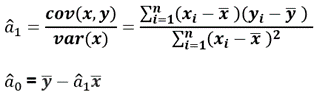

 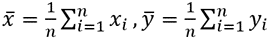

### I-4-1. Calcul des coefficients 

In [132]:
# Todo
# ecrire la fonction calcul_coeff qui retourne les parametres a0 et a1 
### selon l'equation
def calcul_coeff(X,y):
    """
    Args:
      X (ndarray (n,)): Data train, n examples 
      y (ndarray (n,)): target train values
    """ 
     
    return(a1,a0)

 
    
a1,a0=calcul_coeff(X_train,y_train)
 
print("a0=",a0,"a1=",a1)



a0= 12.58999999999999 a1= 0.33685714285714297


### I-4-2.. La fonction coût

La fonction du coût calcule l'erreur entre les valeurs estimées
(\$\hat{Y}\$) et les valeurs réelles (\$Y\$). 

Etant donné un dataset avec \$n\$ données, la fonction coût est définie comme suit:

\$\$J = \frac{1}{n} \sum\limits\_{i=1}^{n}
(Y - \hat{Y})^2\$\$


In [135]:
# TODO
def compute_cost(x, y, a1,a0): 
    """
    Calculer la fonction coût J .
     
    Args:
      x (ndarray (n,))  : Data, n examples 
      y (ndarray (n,))  : target values
      a1,a0 (scalar)    : model parameters  
    
    Returns
        total_cost (float)
    """
    # number of training examples
     
     
    return total_cost


Cost=compute_cost(X_train, y_train, a1,a0)
print(Cost)


0.1712693877551004


In [ ]:
### I-4-3.. Faire la prédiction \$\$\hat{Y} = a0 +a1 X\$\$

In [136]:
#TODO
def predire(X,a0,a1):
    """
    Calculer  y_hat.
     
    Args:
      x (ndarray (n,)): Data, n examples 
      a0,a1 (scalar)    : model parameters  
    
    Returns
        y_hat
    """
     
    return(y_hat)

### I-4-4. Afficher la droite de régression linéaire simple

In [138]:
pl.scatter(X_train,y_train,color='black')
y_pred = predire(X_train,a0,a1)
pl.scatter(X_train,y_pred,color='red')
# set the axis lables names
pl.xlabel("Taille")
pl.ylabel("Poids")
pl.plot(X_train,y_pred,color='blue') 


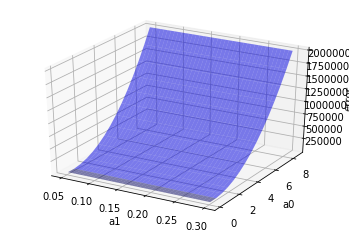

In [13]:
from mpl_toolkits import mplot3d
m, b = a1, a0
 

fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')

ms = np.linspace(0.05, 0.3,40)
bs = np.linspace(0.1, 8.5, 15)

M, B = np.meshgrid(ms, bs)
zs = np.array([compute_cost(X_train,y_train,bp,mp) 
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('a1')
ax.set_ylabel('a0')
ax.set_zlabel('error')

pl.show()

# I-5. Régression lineaire avec scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression
X_train = np.array([160.0, 165.0, 170.0, 175.0,180.0, 185.0, 190])  # taille
X_train=np.array(X_train)
y_train = np.array([66, 68.23, 70.44, 71.29, 73.86,74.68,76.28])    # poids

XX_train=np.array(X_train).reshape(X_train.shape[0],1)
Regressor=LinearRegression()
Regressor.fit(XX_train,y_train)

print('Intercept: \n', Regressor.intercept_)
print('Coefficients: \n', Regressor.coef_)


Intercept: 
 12.589999999999975
Coefficients: 
 [0.33685714]


In [13]:
#Calculer la fonction coût en utilisant la fonction de l'erreur quadratique moyenne (MSE: mean square error) de Sklearn.
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_train, Regressor.predict(XX_train))
print("la fonction J=", MSE)

la fonction J= 0.1712693877551004


### I-6. tester le modele de regression lineaire avec scikit-learn

In [8]:
X_test=np.array(X_test).reshape(X_test.shape[0],1)
y_predict=Regressor.predict(X_test)
pl.scatter(X_test,y_test,color='red')
pl.scatter(X_test,y_predict,color='green')
print(f"Prediction on training set:\n {Regressor.predict(XX_train)[:4]}" )
print(f"Target values \n {y_train[:4]}")

print(f"Prediction on testing set:\n {Regressor.predict(X_test)[:4]}" )
print(f"Target values \n {y_test[:4]}")

Prediction on training set:
 [66.48714286 68.17142857 69.85571429 71.54      ]
Target values 
 [66.   68.23 70.44 71.29]
Prediction on testing set:
 [64.80285714 65.47657143 71.54       73.22428571]
Target values 
 [60 64 70 72]
